In [10]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('wordnet')


# Load the CSV file
df = pd.read_csv('all_posts.csv')  # Change to the correct CSV file name

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alois\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alois\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    text = re.sub(r"[^\w\s]", "", text)
    tokens = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    text = ' '.join(tokens)

    return text



# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Function to create sentiment analysis visualizations
def visualize_sentiment(df, service):
    df['Sentiment'] = df['Text'].apply(analyze_sentiment)

    # Plot a bar chart for sentiment distribution
    sentiment_counts = df['Sentiment'].value_counts()
    sentiment_counts.plot(kind='bar', title=f'Sentiment Distribution for {service}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Generate a word cloud for the service (excluding stopwords, Google, and service name)
    text_for_wordcloud = ' '.join(df['Text'].astype(str))
    stop_words = set(stopwords.words('english'))
    stop_words.add('google')
    stop_words.add('reddit')
    stop_words.add('pixel')
    stop_words.add(service.lower())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_for_wordcloud)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {service}')
    plt.show()

    # Calculate the average sentiment score for the service
    sentiment_scores = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
    df['Sentiment_Score'] = df['Sentiment'].map(sentiment_scores)
    avg_sentiment_score = df['Sentiment_Score'].mean()
    print(f'The average sentiment score for {service} is {avg_sentiment_score:.2f}')



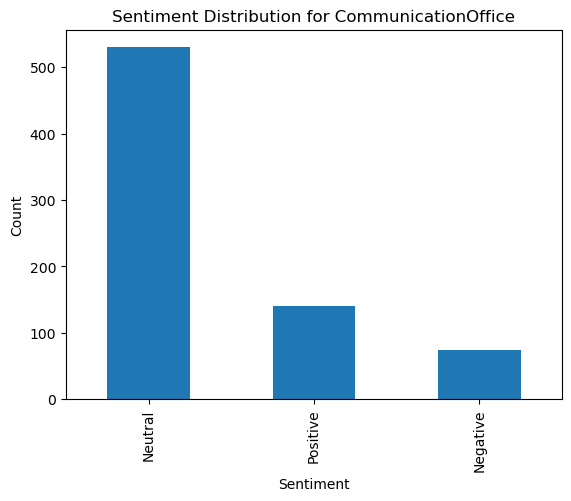

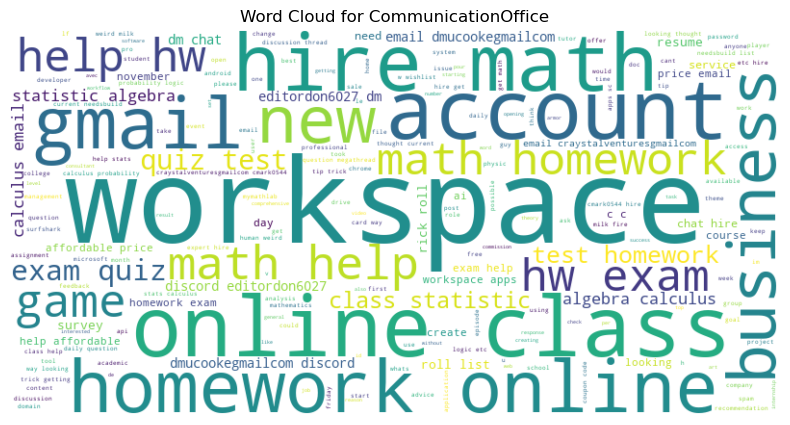

The average sentiment score for CommunicationOffice is 0.09


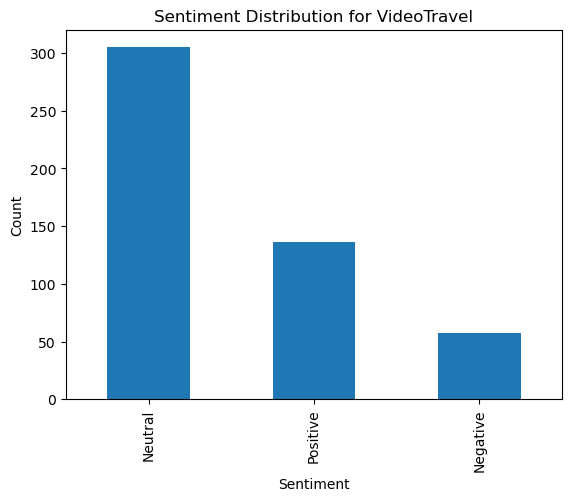

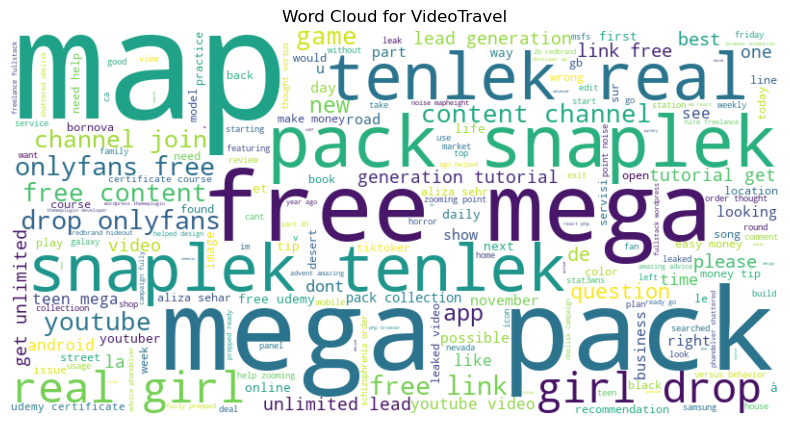

The average sentiment score for VideoTravel is 0.16


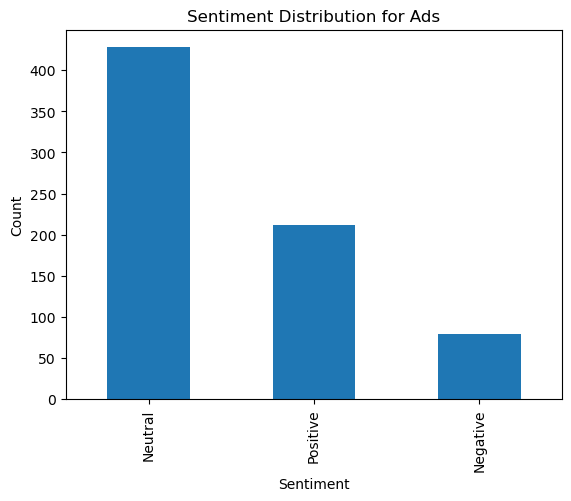

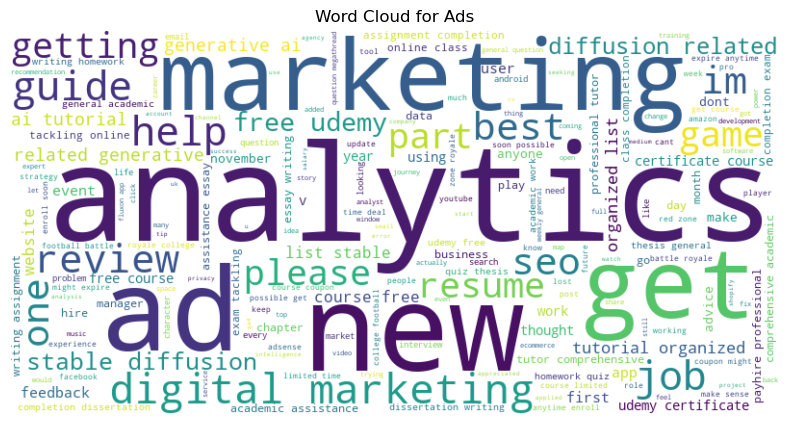

The average sentiment score for Ads is 0.18


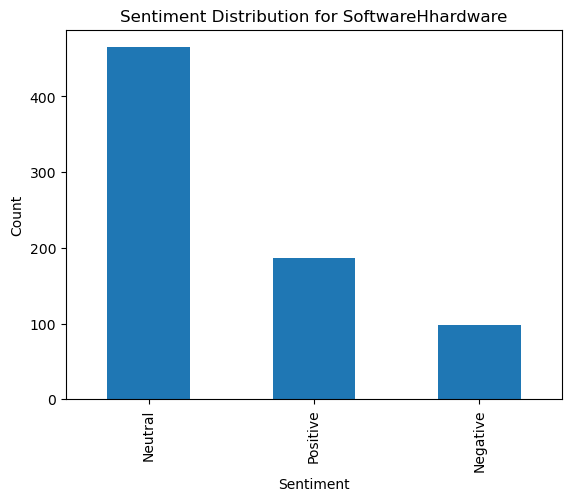

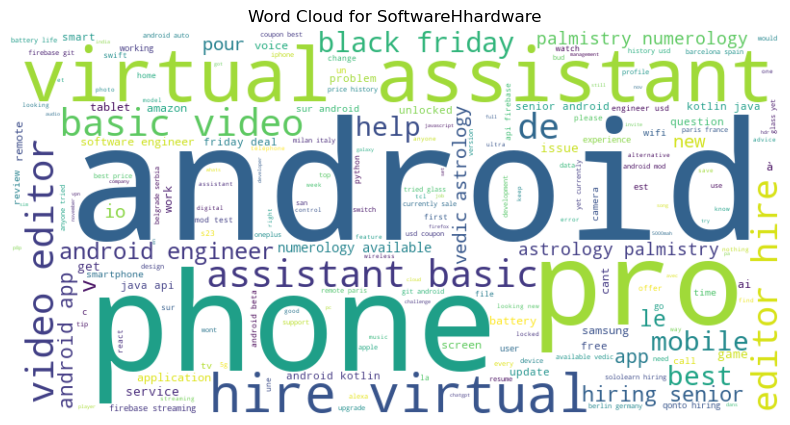

The average sentiment score for SoftwareHhardware is 0.12


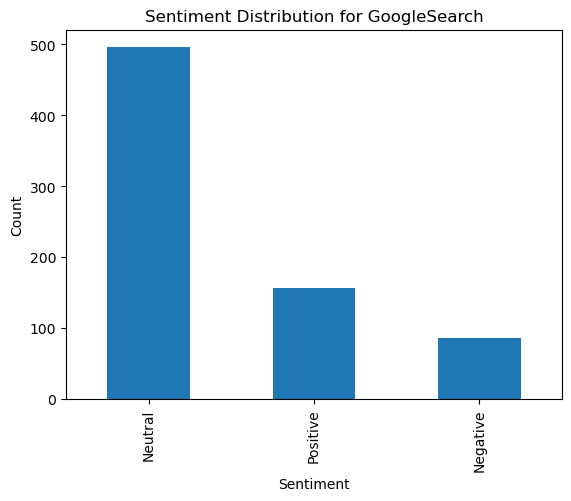

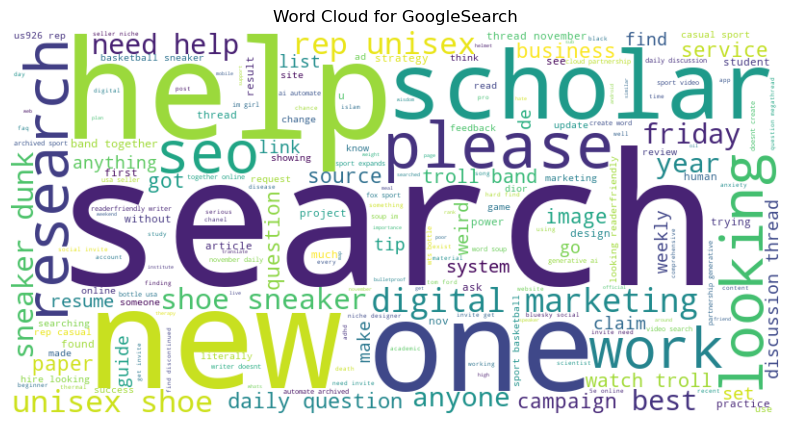

The average sentiment score for GoogleSearch is 0.10


In [12]:
# Drop rows with NaN or empty text
df = df.dropna(subset=['Text'])
df = df[df['Text'].astype(str).str.strip() != '']
df['Text'] = df['Text'].apply(preprocess_text)


services = df['Service'].unique()
avg_scores = {'Service': [], 'Average_Sentiment_Score': []}

for service in services:
    service_df = df[df['Service'] == service]

    visualize_sentiment(service_df, service)

    avg_scores['Service'].append(service)
    avg_scores['Average_Sentiment_Score'].append(service_df['Sentiment_Score'].mean())

avg_scores_df = pd.DataFrame(avg_scores)
avg_scores_df.to_csv('avg_scores.csv', index=False)